<a href="https://colab.research.google.com/github/dashatrue/g_colab/blob/main/MO_lab5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
!pip install tensorflow
import tensorflow as tf

!pip install autokeras
!pip install --upgrade autokeras tensorflow
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)


In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/bank-full.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=';')
data.shape

(45211, 17)

In [ ]:
data["job"] = data["job"].str.replace(".", "", regex=False)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
X = data.drop(['y'], axis=1)  # Убираем целевую переменную 'y'

le = LabelEncoder()
y = le.fit_transform(data['y'])  # Преобразуем 'yes'/'no' в 1/0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Определяем числовые и категориальные столбцы
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns

# Преобразуем категориальные столбцы в dummy переменные (one-hot encoding)
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Приводим тестовые данные к той же форме, что и обучающие
X_train, X_test = X_train.align(X_test, join='left', axis=1)

X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
"""а) поиск по сетке с использованием
пакета scikit-learn"""

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # для roc_auc_score

# Метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Подробный отчёт
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Матрица ошибок
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9051199823067566
Precision: 0.6953125
Recall: 0.33648393194706994
F1-score: 0.4535031847133758
ROC AUC: 0.9301312243064441

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.70      0.34      0.45      1058

    accuracy                           0.91      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.91      0.89      9043


Confusion Matrix:
 [[7829  156]
 [ 702  356]]


In [ ]:
# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
binary_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
}

binary_df = pd.DataFrame(binary_metrics, index=["Binary Classification"])
print(binary_df)


                       Accuracy  Precision    Recall  F1-score   ROC AUC
Binary Classification   0.90512   0.695312  0.336484  0.453503  0.930131


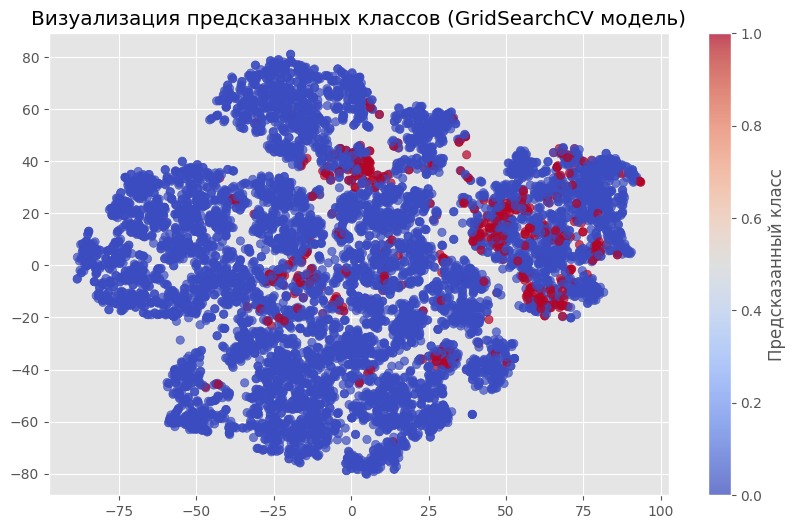

In [ ]:
X_vis = X_test.copy()

# Кодируем строковые признаки, если они есть
for col in X_vis.columns:
    if X_vis[col].dtype == 'object':
        le = LabelEncoder()
        X_vis[col] = le.fit_transform(X_vis[col].astype(str))

# Применяем t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

# Визуализация предсказанных классов
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title('Визуализация предсказанных классов (GridSearchCV модель)')
plt.colorbar(label='Предсказанный класс')
plt.show()

In [ ]:
"""б) оптимизация гиперпараметров и выбор модели с помощью
H2O AutoML"""

h2o.init()

hf = h2o.H2OFrame(data)

hf['y'] = hf['y'].asfactor()

train, test = hf.split_frame(ratios=[0.7], seed=11)

x = [col for col in hf.columns if col != 'y']
y = 'y'

aml = H2OAutoML(max_models=5, seed=1, sort_metric="AUC")
aml.train(x=x, y=y, training_frame=train)

lb = aml.leaderboard
print(lb)

lb_full = h2o.as_list(lb, use_pandas=True)
print(lb_full)

preds = aml.leader.predict(test)

preds.head().as_data_frame()

perf = aml.leader.model_performance(test)
print(perf)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 23 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_a67920
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.818 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_6_20250503_103839     0.936572   0.1935    0.630403                0.171145  0.247628  0.0613197
StackedEnsemble_BestOfFamily_1_AutoML_6_20250503_103839  0.936399   0.193711  0.629761                0.179387  0.247693  0.0613519
GBM_1_AutoML_6_20250503_103839                           0.93565    0.195723  0.627343                0.1471    0.248712  0.0618578
DRF_1_AutoML_6_20250503_103839                           0.929628   0.205796  0.607271                0.165861  0.251707  0.0633563
XGBoost_1_AutoML_6_20250503_103839                       0.928083   0.209233  0.595069                0.178045  0.256824  0.0659584
XGBoost_2_AutoML_6

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.0624164421742759
RMSE: 0.2498328284559015
LogLoss: 0.2005465449295298
AUC: 0.9320819655015439
AUCPR: 0.62944969590436
Gini: 0.8641639310030877
Null degrees of freedom: 13474
Residual degrees of freedom: 13470
Null deviance: 9837.818514081657
Residual deviance: 5404.729385850828
AIC: 5414.729385850828

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34484915649694425
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     11047  824    0.0694   (824.0/11871.0)
yes    480    1124   0.2993   (480.0/1604.0)
Total  11527  1948   0.0968   (1304.0/13475.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.344849     0.632883  192
max f2                       0.158843     0.745441  272
max f0point5                 0.4807

In [ ]:
preds_df = preds.as_data_frame()
y_true = test[y].as_data_frame().values.flatten()
y_pred = preds_df['predict'].values
y_proba = preds_df['yes'].values  # <-- тут правильно

binary_metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred, pos_label='yes'),
    "Recall": recall_score(y_true, y_pred, pos_label='yes'),
    "F1-score": f1_score(y_true, y_pred, pos_label='yes'),
    "ROC AUC": roc_auc_score((y_true == 'yes').astype(int), y_proba)
}

binary_df = pd.DataFrame(binary_metrics, index=["Binary Classification (H2O)"])

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
"""в) Autokeras"""



'в) Autokeras'

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/bank-full.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=';')

X = data.drop(['y'], axis=1)  # Убираем целевую переменную 'y'

le = LabelEncoder()
y = le.fit_transform(data['y'])  # Преобразуем 'yes'/'no' в 1/0

X = pd.get_dummies(X)

# Преобразование в numpy-массивы
X = X.values
y = y  # можно также y = y.to_numpy(), если y был pd.Series

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Автоматическая модель от AutoKeras
clf = ak.AutoModel(
    inputs=ak.Input(),  # AutoKeras сам определит форму входа
    outputs=ak.ClassificationHead(
        loss="binary_crossentropy",  # Бинарная кросс-энтропия — правильно для 0/1
        metrics=["accuracy", tf.keras.metrics.AUC(name='auc')]
    ),
    max_trials=10,
    overwrite=True,
    directory='binary_classification',
    project_name='churn_prediction'
)

# Обучение модели
clf.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

# Оценка лучшей модели
best_model = clf.export_model()
test_loss, test_acc, test_auc = best_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}, Test AUC: {test_auc:.4f}")

Trial 10 Complete [00h 00m 56s]
val_loss: 0.20220939815044403

Best val_loss So Far: 0.19816134870052338
Total elapsed time: 00h 12m 19s
Epoch 1/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8846 - auc: 0.8555 - loss: 0.3122
Epoch 2/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8984 - auc: 0.9039 - loss: 0.2293
Epoch 3/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8989 - auc: 0.9092 - loss: 0.2235
Epoch 4/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8994 - auc: 0.9165 - loss: 0.2165
Epoch 5/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9011 - auc: 0.9166 - loss: 0.2163
Epoch 6/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9022 - auc: 0.9214 - loss: 0.2117
Epoch 7/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9039 - auc: 0.9233 - loss: 0.2091
Epoch 8/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9050 - auc: 0.9228 - loss: 0.2102
Epoch 9/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3m

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9090 - auc: 0.9335 - loss: 0.2040

Test Accuracy: 0.9082, Test AUC: 0.9328


In [ ]:
# Предсказания
y_pred = (best_model.predict(X_test) > 0.5).astype("int32").flatten()  # бинарный вывод
y_proba = best_model.predict(X_test).flatten()  # вероятности

# Метрики
binary_metrics_ak = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
}

binary_df_ak = pd.DataFrame(binary_metrics_ak, index=["Binary Classification (AutoKeras)"])


 64/283 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 51))
  warnings.warn(msg)


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# МНОГОКЛАССОВАЯ КЛАССИФИКАЦИЯ
url = '/content/drive/MyDrive/Colab Notebooks/bank-full.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=';')

data["job"] = data["job"].str.replace(".", "", regex=False)

In [ ]:
# Целевая переменная — marital
y = data['marital']
X = data.drop(['marital'], axis=1)  # Убираем целевой столбец из признаков

# Преобразуем текстовые метки классов (married/single/divorced) в числа
le = LabelEncoder()
y = le.fit_transform(y)  # Например: 'married' → 1, 'single' → 2, ...

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=43
)

# Определяем числовые и категориальные признаки
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns

# One-hot encoding категориальных признаков
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Приведение X_test к тем же столбцам, что у X_train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Убедимся, что типы данных целочисленные (необязательно, но может быть полезно)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
"""а) поиск по сетке с использованием
пакета scikit-learn"""
from sklearn.preprocessing import label_binarize

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# Метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))

# ROC AUC (только если более двух классов и y_proba доступно)
# Используем One-vs-Rest подход
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
print("ROC AUC:", roc_auc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 0.6736702421762689
Precision: 0.5036518762551884
Recall: 0.46010319000138833
F1-score: 0.4473766459808443
ROC AUC: 0.7310125993758518

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.01      0.01      1042
           1       0.68      0.89      0.77      5443
           2       0.66      0.48      0.55      2558

    accuracy                           0.67      9043
   macro avg       0.50      0.46      0.45      9043
weighted avg       0.62      0.67      0.62      9043


Confusion Matrix:
[[   8  947   87]
 [  29 4854  560]
 [   9 1319 1230]]


In [ ]:
# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# Binarize y_test
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Метрики
multi_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "F1-score": f1_score(y_test, y_pred, average='macro'),
    "ROC AUC": roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
}

multi_df = pd.DataFrame(multi_metrics, index=["Multiclass Classification"])
print(multi_df)


                           Accuracy  Precision    Recall  F1-score   ROC AUC
Multiclass Classification   0.67367   0.503652  0.460103  0.447377  0.731013


In [ ]:
comparison_df = pd.concat([binary_df, multi_df])
print("\nСравнение метрик:\n")
print(comparison_df)


Сравнение метрик:

                             Accuracy  Precision    Recall  F1-score   ROC AUC
Binary Classification (H2O)  0.896104   0.546832  0.742519  0.629825  0.932197
Multiclass Classification    0.673670   0.503652  0.460103  0.447377  0.731013


In [ ]:
"""б) оптимизация гиперпараметров и выбор модели с помощью
H2O AutoML"""
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
h2o.init()
hf = h2o.H2OFrame(data)

hf['marital'] = hf['marital'].asfactor()

train, test = hf.split_frame(ratios=[0.7], seed=11)

x = [col for col in hf.columns if col != 'marital']
y = 'marital'

# Используем метрику, подходящую для многоклассовой задачи
aml = H2OAutoML(max_models=5, seed=1, sort_metric="mean_per_class_error")
aml.train(x=x, y=y, training_frame=train)

preds = aml.leader.predict(test)
preds_df = preds.as_data_frame()

print(preds.head().as_data_frame())

perf = aml.leader.model_performance(test)
print(perf)


# Получаем точность, precision, recall, f1-score
y_true = test[y].as_data_frame().values.flatten()
y_pred = preds_df['predict'].values

# Выводим классификационные метрики
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Выводим матрицу ошибок
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 20 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_a67920
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.969 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
08:38:13.612: GLM_1_AutoML_3_20250503_83558 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 50 out of bounds for length 50

█████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


   predict  divorced   married    single
0  married  0.381410  0.544871  0.073719
1  married  0.081967  0.772549  0.145484
2  married  0.251982  0.468739  0.279280
3  married  0.238757  0.727663  0.033580
4  married  0.098739  0.684394  0.216867
5  married  0.216072  0.721522  0.062406
6  married  0.147271  0.648467  0.204261
7  married  0.238012  0.677646  0.084342
8  married  0.389792  0.523938  0.086269
9  married  0.075056  0.882014  0.042930
ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.2633479436989349
RMSE: 0.513174379425683
LogLoss: 0.7794623096085157
Mean Per-Class Error: 0.5323341286877579
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
y_true = test[y].as_data_frame().values.flatten()
y_pred = preds_df['predict'].values

# Метрики
multi_metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred, average='macro'),
    "Recall": recall_score(y_true, y_pred, average='macro'),
    "F1-score": f1_score(y_true, y_pred, average='macro'),
    "ROC AUC": None  # Многоклассовая ROC AUC требует бинаризации
}

# Бинаризуем классы и считаем ROC AUC (если есть вероятности)
if len(preds_df.columns) > 2:
    classes = sorted(test[y].as_data_frame()[y].unique())
    y_true_bin = label_binarize(y_true, classes=classes)
    y_proba = preds_df[classes].values  # вероятности по всем классам
    try:
        roc_auc = roc_auc_score(y_true_bin, y_proba, multi_class='ovr', average='macro')
        multi_metrics["ROC AUC"] = roc_auc
    except:
        pass

multi_df = pd.DataFrame(multi_metrics, index=["Multiclass Classification (H2O)"])

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
comparison_df_h2o = pd.concat([binary_df, multi_df])
print("\nСравнение метрик (H2O AutoML):\n")
print(comparison_df_h2o)


Сравнение метрик (H2O AutoML):

                                 Accuracy  Precision    Recall  F1-score  \
Binary Classification (H2O)      0.896104   0.546832  0.742519  0.629825   
Multiclass Classification (H2O)  0.673692   0.543379  0.467666  0.458288   

                                  ROC AUC  
Binary Classification (H2O)      0.932197  
Multiclass Classification (H2O)  0.731346  


In [ ]:
"""в) Autokeras"""
from tensorflow.keras.utils import to_categorical
# Загрузка и подготовка данных
url = '/content/drive/MyDrive/Colab Notebooks/bank-full.csv'
data = pd.read_csv(url, header=0, na_values='?', delimiter=';')

# Выбираем целевую переменную для многоклассовой классификации
target_column = 'marital'

X = data.drop([target_column], axis=1)
y = data[target_column]

# Кодируем целевую переменную в числа
le = LabelEncoder()
y = le.fit_transform(y)

# Преобразуем целевую переменную в one-hot формат
y = to_categorical(y)

# One-hot кодирование признаков
X = pd.get_dummies(X)

# Преобразование в numpy
X = X.values

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y.argmax(axis=1), random_state=42
)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Автоматическая модель от AutoKeras для многоклассовой классификации
clf = ak.AutoModel(
    inputs=ak.Input(),
    outputs=ak.ClassificationHead(
        loss="categorical_crossentropy",  # Многоклассовая кросс-энтропия
        metrics=["accuracy"]
    ),
    max_trials=10,
    overwrite=True,
    directory='multiclass_classification',
    project_name='marital_prediction'
)

# Обучение
clf.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

# Оценка
best_model = clf.export_model()
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

Trial 10 Complete [00h 00m 37s]
val_loss: 0.754294216632843

Best val_loss So Far: 0.7524448037147522
Total elapsed time: 00h 07m 21s
Epoch 1/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5495 - loss: 1.0478
Epoch 2/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6540 - loss: 0.8050
Epoch 3/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6628 - loss: 0.7901
Epoch 4/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6641 - loss: 0.7824
Epoch 5/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6681 - loss: 0.7770
Epoch 6/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6692 - loss: 0.7735
Epoch 7/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6704 - loss: 0.7705
Epoch 8/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6738 - loss: 0.7707
Epoch 9/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6702 - loss: 0.7710
Epoch 10/30
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6720 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6775 - loss: 0.7613

Test Accuracy: 0.6752


In [ ]:
# Предсказания
y_proba = best_model.predict(X_test)  # вероятности
y_pred = y_proba.argmax(axis=1)
y_true = y_test.argmax(axis=1)  # предполагается, что y_test в one-hot

# Метрики
multi_metrics_ak = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred, average='macro'),
    "Recall": recall_score(y_true, y_pred, average='macro'),
    "F1-score": f1_score(y_true, y_pred, average='macro'),
    "ROC AUC": None
}

# ROC AUC (по всем классам)
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
try:
    roc_auc = roc_auc_score(y_true_bin, y_proba, multi_class='ovr', average='macro')
    multi_metrics_ak["ROC AUC"] = roc_auc
except:
    pass

multi_df_ak = pd.DataFrame(multi_metrics_ak, index=["Multiclass Classification (AutoKeras)"])


114/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 50))
  warnings.warn(msg)


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
comparison_df_ak = pd.concat([binary_df_ak, multi_df_ak])
print("\nСравнение метрик (AutoKeras):\n")
print(comparison_df_ak)


Сравнение метрик (AutoKeras):

                                       Accuracy  Precision    Recall  \
Binary Classification (AutoKeras)      0.908216   0.653639  0.458412   
Multiclass Classification (AutoKeras)  0.675218   0.448654  0.455438   

                                       F1-score   ROC AUC  
Binary Classification (AutoKeras)      0.538889  0.926567  
Multiclass Classification (AutoKeras)  0.440172  0.740939  


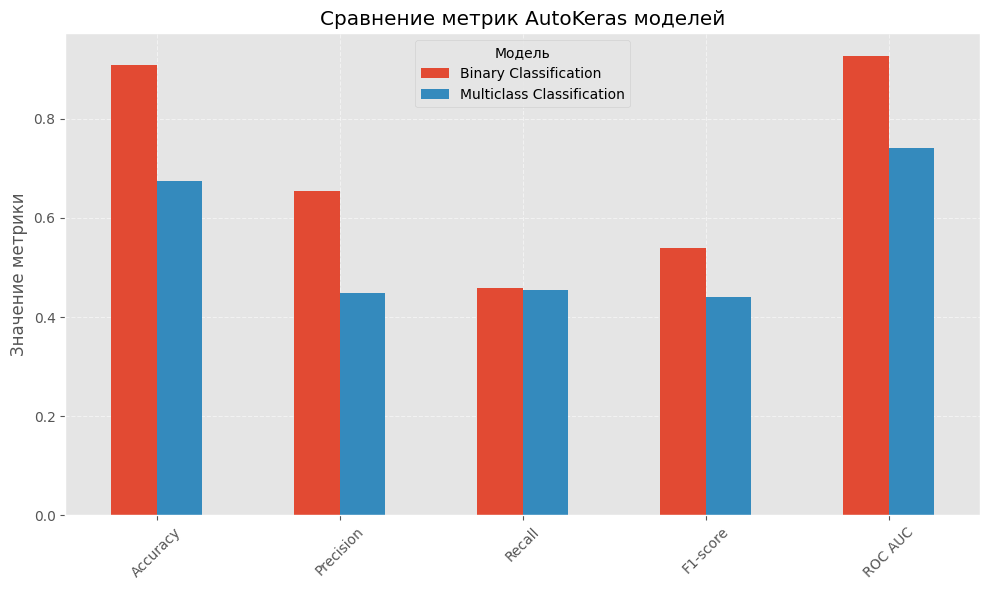

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd

# Данные
metrics_df = pd.DataFrame({
    "Accuracy": [0.908216, 0.675218],
    "Precision": [0.653639, 0.448654],
    "Recall": [0.458412, 0.455438],
    "F1-score": [0.538889, 0.440172],
    "ROC AUC": [0.926567, 0.740939]
}, index=["Binary Classification", "Multiclass Classification"])

# Построение графика
metrics_df.T.plot(kind="bar", figsize=(10, 6))
plt.title("Сравнение метрик AutoKeras моделей")
plt.ylabel("Значение метрики")
plt.xticks(rotation=45)
plt.legend(title="Модель")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
